<a href="https://colab.research.google.com/github/ellaodinec/EllaOdinec/blob/main/Ella_Odinec_Data_Science_Research_Final_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Questions for Mentor/TA**
*   Should I also look at variability, decelerations, and accelerations because they can be found from a histogram?
*   How would I go about completing t-tests and finding p-values for the variables I am focusing on?

**Next Steps**
- Linear and logistic regression models after KNN predictor

In [2]:
#Libraries
import warnings
warnings.filterwarnings('ignore')

!pip install pandas
import pandas as pd

!pip install numpy # you can comment this out after the first time - Kyla
import numpy as np

!pip install matplotlib # you can comment this out after the first time
import matplotlib.pyplot as plt

!pip install scikit-learn # you can comment this out after the first time
from sklearn import datasets, model_selection, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.feature_selection import SelectKBest

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer, fetch_california_housing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from scipy.stats import ttest_ind, ttest_rel, f_oneway

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
#Dataset
df  = pd.read_csv('/content/fetal_health.csv')
print(df.head())

   baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0

**Research Question**: How well can a heart rate histogram be used to predict a fetus’ health?

**Understand Your Data Set**:
* see [this](https://colab.research.google.com/drive/1PYaue0QkaKmNu0qnuEiTMkT2a0Z1hb6z#scrollTo=jjB4kUvFslGy) google colab for exploratory data analysis
*   all variables are cateogrical --> fetus_health is coded as 1,2,3 but each number represents a health classification (normal, suspected, pathological)
- comparing many variables that relate to fetus heart rate and other qualities and how they impact fetus health
- This dataset contains 2126 records of features extracted from Cardiotocogram exams
- where are these cardiotocograms come from? are the representative of a certain population? How generalized can conclusions from this dataset be?
- surface level info abt variability, decelerations, and accelerations can be found from a heart rate histogram --> should I include this in my data analysis








*  A fetal heart rate histogram is a visual representation of the distribution of a fetus's heart rate measurements over a specific period
* heart rate histograms show patterns of a fetus' heart rate which can reveal helpful information about their health
- heart rate histograms can be used to find accelerations, decelerations, and variability of a fetus' heart rate which then also reveal helpful information about their health
- healthcare providers can identify potential issues early on through heart rate histograms
- a low average heart rate indicates potential issues with a fetus' wellbeing

**Understanding Dataset**

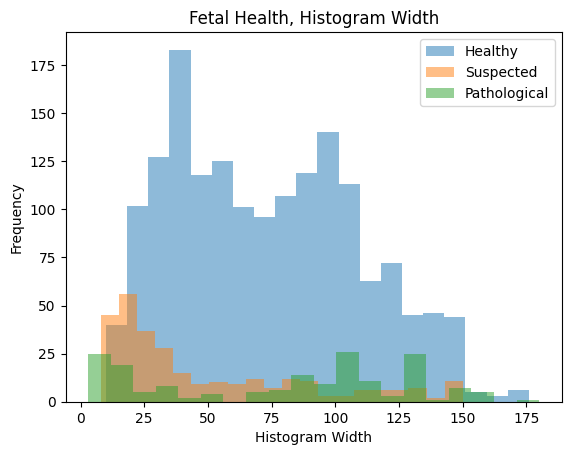

In [4]:
plt.hist(df[df['fetal_health'] == 1]['histogram_width'], bins=20, alpha=0.5, label='Healthy')
plt.hist(df[df['fetal_health'] == 2]['histogram_width'], bins=20, alpha=0.5, label='Suspected')
plt.hist(df[df['fetal_health'] == 3]['histogram_width'], bins=20, alpha=0.5, label='Pathological')

plt.legend()
plt.title("Fetal Health, Histogram Width")
plt.xlabel('Histogram Width')
plt.ylabel('Frequency')

plt.show()

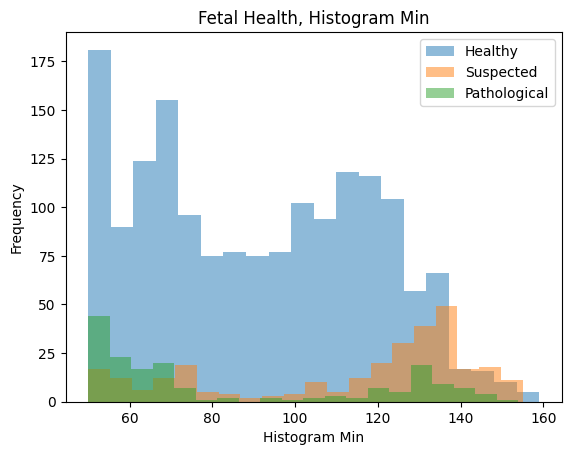

In [5]:
plt.hist(df[df['fetal_health'] == 1]['histogram_min'], bins=20, alpha=0.5, label='Healthy')
plt.hist(df[df['fetal_health'] == 2]['histogram_min'], bins=20, alpha=0.5, label='Suspected')
plt.hist(df[df['fetal_health'] == 3]['histogram_min'], bins=20, alpha=0.5, label='Pathological')

plt.legend()
plt.title("Fetal Health, Histogram Min")
plt.xlabel('Histogram Min')
plt.ylabel('Frequency')

plt.show()

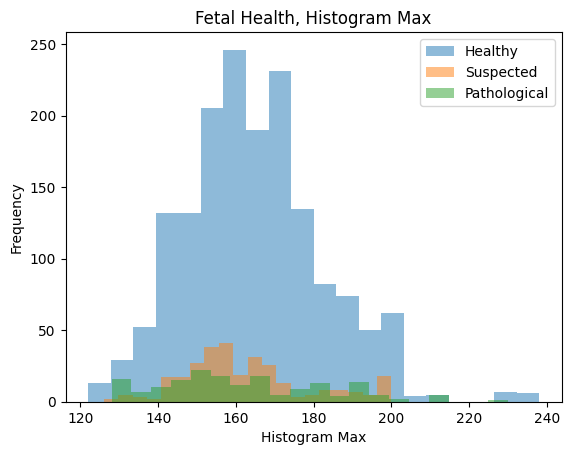

In [6]:
plt.hist(df[df['fetal_health'] == 1]['histogram_max'], bins=20, alpha=0.5, label='Healthy')
plt.hist(df[df['fetal_health'] == 2]['histogram_max'], bins=20, alpha=0.5, label='Suspected')
plt.hist(df[df['fetal_health'] == 3]['histogram_max'], bins=20, alpha=0.5, label='Pathological')

plt.legend()
plt.title("Fetal Health, Histogram Max")
plt.xlabel('Histogram Max')
plt.ylabel('Frequency')

plt.show()

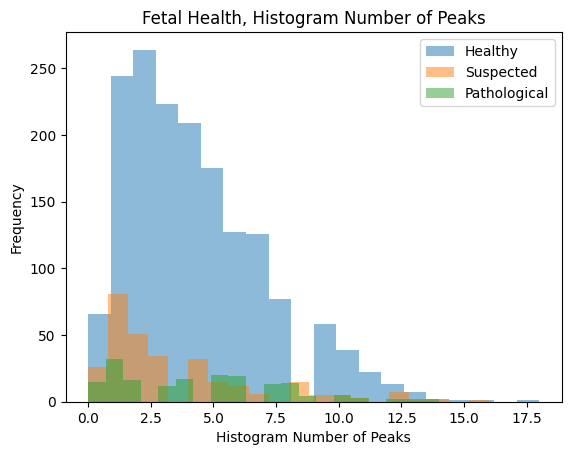

In [7]:
plt.hist(df[df['fetal_health'] == 1]['histogram_number_of_peaks'], bins=20, alpha=0.5, label='Healthy')
plt.hist(df[df['fetal_health'] == 2]['histogram_number_of_peaks'], bins=20, alpha=0.5, label='Suspected')
plt.hist(df[df['fetal_health'] == 3]['histogram_number_of_peaks'], bins=20, alpha=0.5, label='Pathological')

plt.legend()
plt.title("Fetal Health, Histogram Number of Peaks")
plt.xlabel('Histogram Number of Peaks')
plt.ylabel('Frequency')

plt.show()

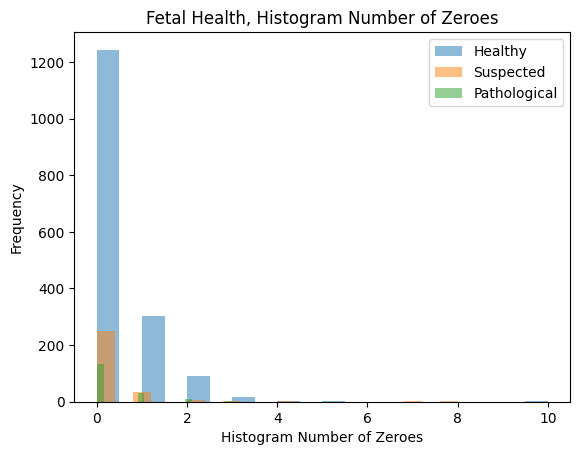

In [8]:
plt.hist(df[df['fetal_health'] == 1]['histogram_number_of_zeroes'], bins=20, alpha=0.5, label='Healthy')
plt.hist(df[df['fetal_health'] == 2]['histogram_number_of_zeroes'], bins=20, alpha=0.5, label='Suspected')
plt.hist(df[df['fetal_health'] == 3]['histogram_number_of_zeroes'], bins=20, alpha=0.5, label='Pathological')

plt.legend()
plt.title("Fetal Health, Histogram Number of Zeroes")
plt.xlabel('Histogram Number of Zeroes')
plt.ylabel('Frequency')

plt.show()

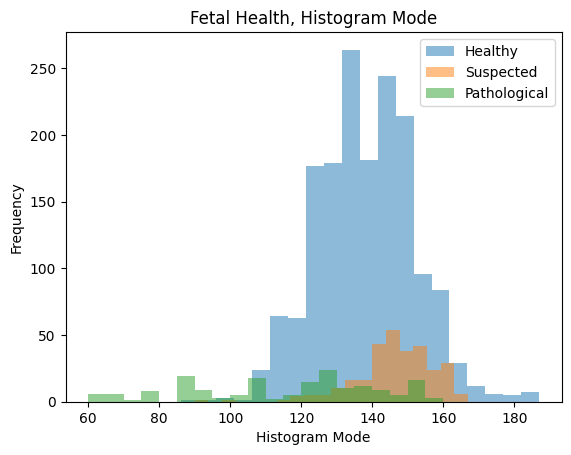

In [9]:
plt.hist(df[df['fetal_health'] == 1]['histogram_mode'], bins=20, alpha=0.5, label='Healthy')
plt.hist(df[df['fetal_health'] == 2]['histogram_mode'], bins=20, alpha=0.5, label='Suspected')
plt.hist(df[df['fetal_health'] == 3]['histogram_mode'], bins=20, alpha=0.5, label='Pathological')

plt.legend()
plt.title("Fetal Health, Histogram Mode")
plt.xlabel('Histogram Mode')
plt.ylabel('Frequency')

plt.show()

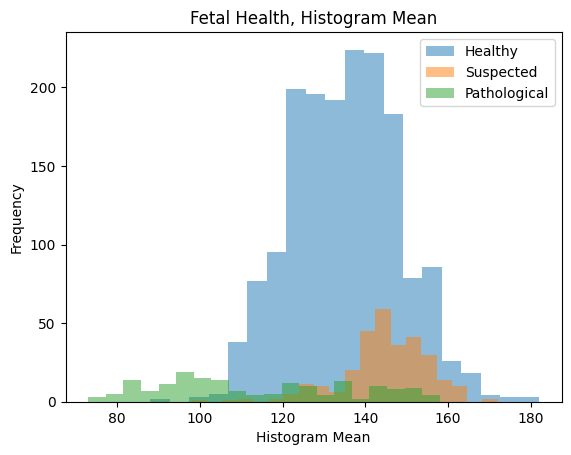

In [10]:
plt.hist(df[df['fetal_health'] == 1]['histogram_mean'], bins=20, alpha=0.5, label='Healthy')
plt.hist(df[df['fetal_health'] == 2]['histogram_mean'], bins=20, alpha=0.5, label='Suspected')
plt.hist(df[df['fetal_health'] == 3]['histogram_mean'], bins=20, alpha=0.5, label='Pathological')

plt.legend()
plt.title("Fetal Health, Histogram Mean")
plt.xlabel('Histogram Mean')
plt.ylabel('Frequency')

plt.show()

It looks like the fetuses with the slowest avg heart rate are typically pathological (unhealthy)

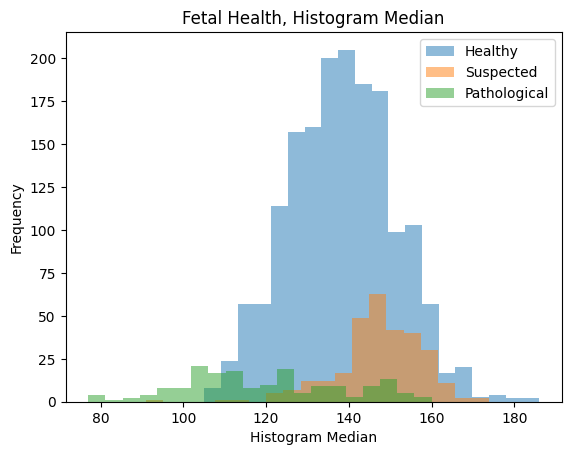

In [11]:
plt.hist(df[df['fetal_health'] == 1]['histogram_median'], bins=20, alpha=0.5, label='Healthy')
plt.hist(df[df['fetal_health'] == 2]['histogram_median'], bins=20, alpha=0.5, label='Suspected')
plt.hist(df[df['fetal_health'] == 3]['histogram_median'], bins=20, alpha=0.5, label='Pathological')

plt.legend()
plt.title("Fetal Health, Histogram Median")
plt.xlabel('Histogram Median')
plt.ylabel('Frequency')

plt.show()

Again, lowest heart rates for mean median and mode all point to pathological

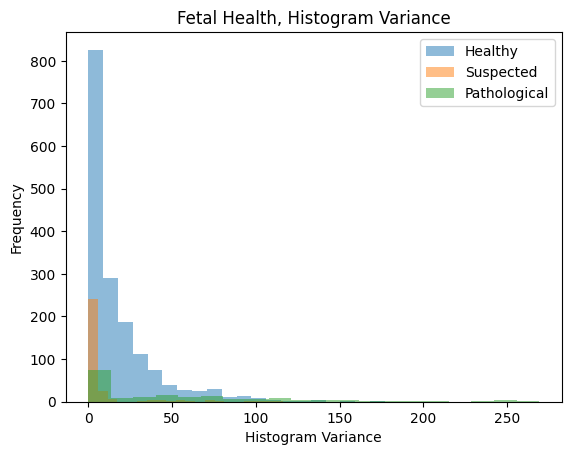

In [12]:
plt.hist(df[df['fetal_health'] == 1]['histogram_variance'], bins=20, alpha=0.5, label='Healthy')
plt.hist(df[df['fetal_health'] == 2]['histogram_variance'], bins=20, alpha=0.5, label='Suspected')
plt.hist(df[df['fetal_health'] == 3]['histogram_variance'], bins=20, alpha=0.5, label='Pathological')

plt.legend()
plt.title("Fetal Health, Histogram Variance")
plt.xlabel('Histogram Variance')
plt.ylabel('Frequency')

plt.show()

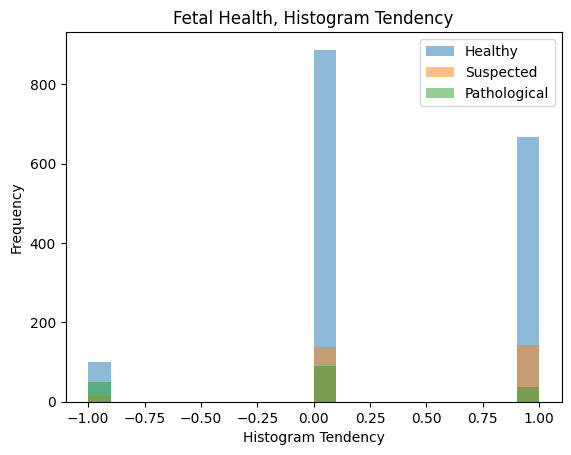

In [13]:
# Can you explain what you are explaining with this graph?

plt.hist(df[df['fetal_health'] == 1]['histogram_tendency'], bins=20, alpha=0.5, label='Healthy')
plt.hist(df[df['fetal_health'] == 2]['histogram_tendency'], bins=20, alpha=0.5, label='Suspected')
plt.hist(df[df['fetal_health'] == 3]['histogram_tendency'], bins=20, alpha=0.5, label='Pathological')

plt.legend()
plt.title("Fetal Health, Histogram Tendency")
plt.xlabel('Histogram Tendency')
plt.ylabel('Frequency')

plt.show()

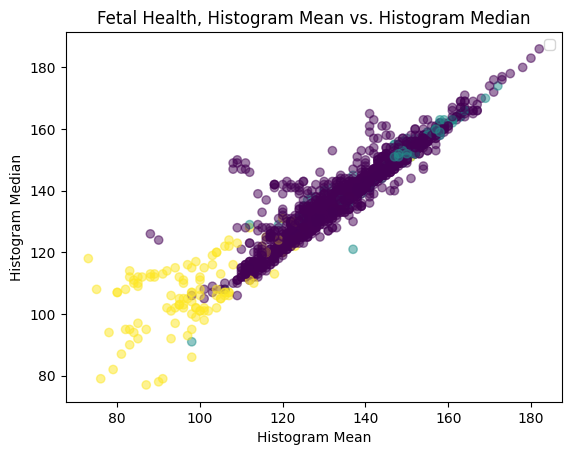

In [14]:
plt.scatter(df['histogram_mean'], df['histogram_median'], c=df['fetal_health'], cmap='viridis', alpha=0.5)
plt.legend()
plt.ylabel("Histogram Median")
plt.xlabel("Histogram Mean")
plt.title("Fetal Health, Histogram Mean vs. Histogram Median")
plt.show()

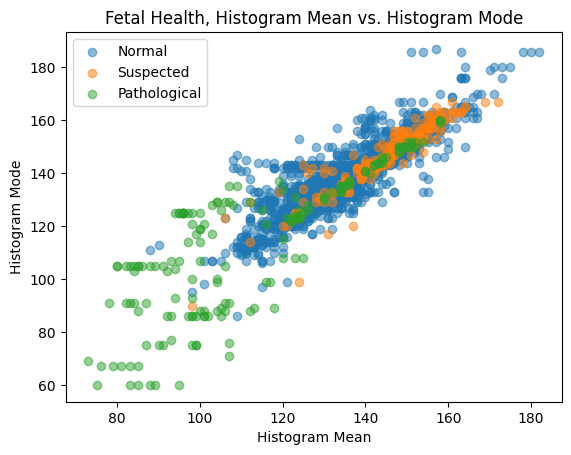

In [15]:
plt.scatter(df[df['fetal_health']==1]['histogram_mean'], df[df['fetal_health']==1]['histogram_mode'], alpha = 0.5, label = 'Normal')
plt.scatter(df[df['fetal_health']==2]['histogram_mean'], df[df['fetal_health']==2]['histogram_mode'], alpha = 0.5, label = 'Suspected')
plt.scatter(df[df['fetal_health']==3]['histogram_mean'], df[df['fetal_health']==3]['histogram_mode'], alpha = 0.5, label = 'Pathological')

plt.legend()
plt.ylabel("Histogram Mode")
plt.xlabel("Histogram Mean")
plt.title("Fetal Health, Histogram Mean vs. Histogram Mode")
plt.show()

relationship btwn mean and median, also lowest values of each lead to pathological and suspected on the higher end of both

fetal_health
1.0    135.102115
2.0    144.759322
3.0    112.977273
Name: histogram_mean, dtype: float64


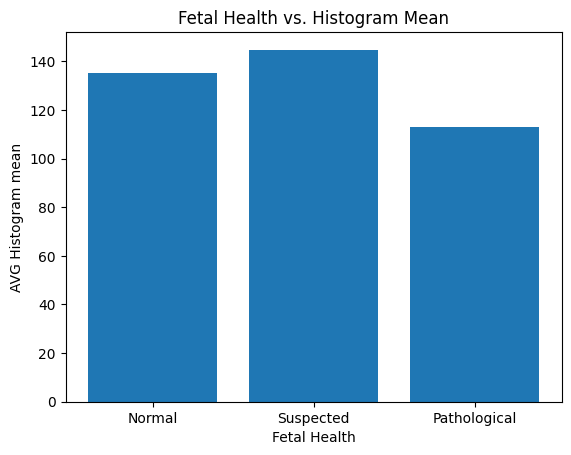

In [16]:
categories = ['Normal', 'Suspected', 'Pathological']
bars = df.groupby('fetal_health')['histogram_mean'].mean()
print(bars)


plt.bar(categories, bars)
plt.ylabel("AVG Histogram mean")
plt.xlabel("Fetal Health")
plt.title("Fetal Health vs. Histogram Mean")
plt.show()

pathological lowest

fetal_health
1.0    138.459819
2.0    147.071186
3.0    119.562500
Name: histogram_median, dtype: float64


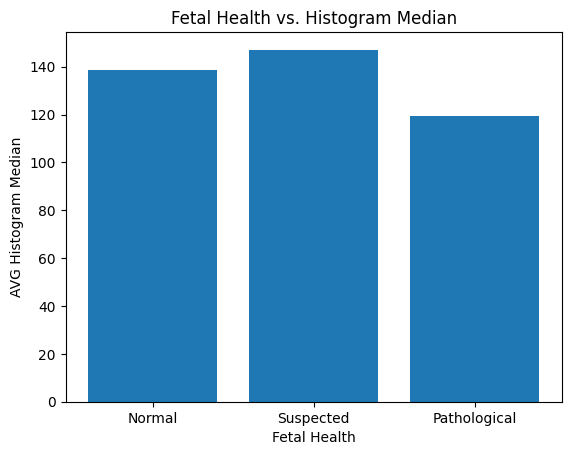

In [17]:
categories = ['Normal', 'Suspected', 'Pathological']
bars = df.groupby('fetal_health')['histogram_median'].mean()
print(bars)

plt.bar(categories, bars)
plt.ylabel("AVG Histogram Median")
plt.xlabel("Fetal Health")
plt.title("Fetal Health vs. Histogram Median")
plt.show()

fetal_health
1.0    138.258610
2.0    146.555932
3.0    114.607955
Name: histogram_mode, dtype: float64


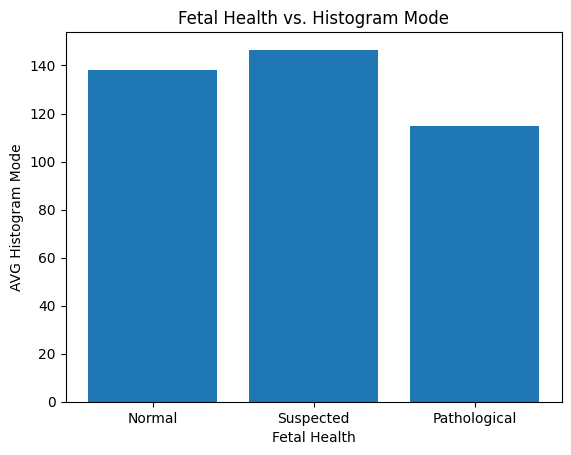

In [18]:
categories = ['Normal', 'Suspected', 'Pathological']
bars = df.groupby('fetal_health')['histogram_mode'].mean()
print(bars)

plt.bar(categories, bars)
plt.ylabel("AVG Histogram Mode")
plt.xlabel("Fetal Health")
plt.title("Fetal Health vs. Histogram Mode")
plt.show()

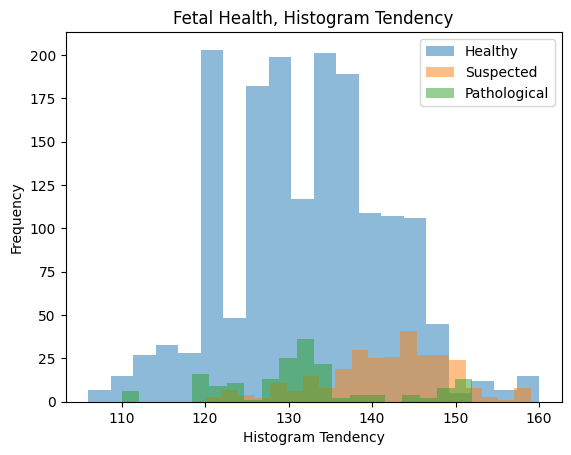

In [20]:
plt.hist(df[df['fetal_health'] == 1]['baseline value'], bins=20, alpha=0.5, label='Healthy')
plt.hist(df[df['fetal_health'] == 2]['baseline value'], bins=20, alpha=0.5, label='Suspected')
plt.hist(df[df['fetal_health'] == 3]['baseline value'], bins=20, alpha=0.5, label='Pathological')

plt.legend()
plt.title("Fetal Health, Histogram Tendency")
plt.xlabel('Histogram Tendency')
plt.ylabel('Frequency')

plt.show()

**Plan the Research Design**
*  test my question through creating a machine learning model with all of the histogram data
- test my question by using t tests to see how significant the histogram results are
- create confusion matrixes, correlation tables, histograms, box plots, violin plots, and other plots to represent data in a way that informs the question
- hoping to find correlation, predictive and descriptive results

**Clean and Prepare Data for Analysis**

In [21]:
#new dataset with only the variables I want to focus on to answer my research question
df_h = df[['histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency', 'fetal_health']]
print(df_h)

      histogram_width  histogram_min  histogram_max  \
0                64.0           62.0          126.0   
1               130.0           68.0          198.0   
2               130.0           68.0          198.0   
3               117.0           53.0          170.0   
4               117.0           53.0          170.0   
...               ...            ...            ...   
2121             40.0          137.0          177.0   
2122             66.0          103.0          169.0   
2123             67.0          103.0          170.0   
2124             66.0          103.0          169.0   
2125             42.0          117.0          159.0   

      histogram_number_of_peaks  histogram_number_of_zeroes  histogram_mode  \
0                           2.0                         0.0           120.0   
1                           6.0                         1.0           141.0   
2                           5.0                         1.0           141.0   
3                      

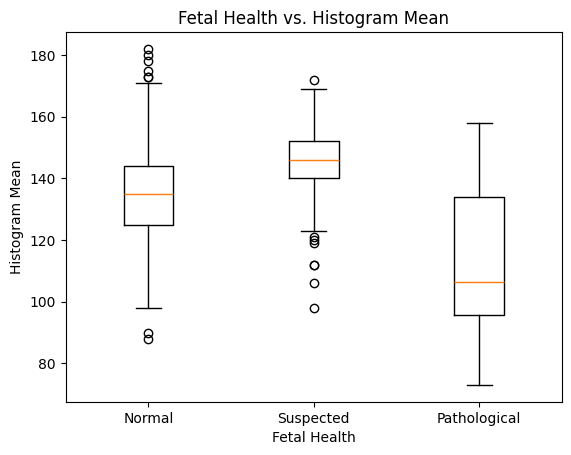

In [22]:

health = [df[df['fetal_health'] == i]['histogram_mean'].dropna() for i in [1., 2., 3.]]

plt.boxplot(health, labels=['Normal', 'Suspected', 'Pathological'])

plt.title("Fetal Health vs. Histogram Mean")
plt.xlabel('Fetal Health')
plt.ylabel('Histogram Mean')

plt.show()

#HELP WITH HISTOGRAMS TO FIND OUTLIERS --> SHOULD I GET RID OF THEM, OR JUST ACKNOWLEDGE

Outliers, but would make sense because heart rate can vary a lot depending on the health of a fetus

Does a low/high heart rate cause a fetus' health to change or is it just representative of health issues caused by something else? Dependent variable or independent?

Looking at how we can use them to predict, so not too important for the research question if they represent a fetus' health or cause a fetus' health to change

**Choose Your Analysis Approach**

In [23]:
df_h.describe()

,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


Accuracy Score:  0.8661971830985915


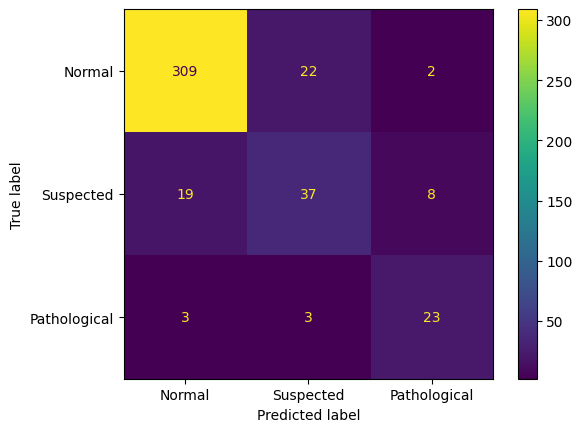

In [24]:
features = df[['histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency']]
label = df['fetal_health']

X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 1)

model.fit(X_train, y_train)
predict = model.predict(X_test)

print("Accuracy Score: ", metrics.accuracy_score(y_test, predict))

metrics.ConfusionMatrixDisplay.from_predictions(y_test, predict, display_labels=["Normal", "Suspected", "Pathological"])

{1: np.float64(86.61971830985915), 3: np.float64(86.15023474178403), 5: np.float64(84.74178403755869), 7: np.float64(82.62910798122066), 9: np.float64(82.86384976525821), 11: np.float64(83.09859154929578), 13: np.float64(83.09859154929578), 15: np.float64(84.03755868544602), 17: np.float64(84.50704225352112), 19: np.float64(84.97652582159625), 21: np.float64(84.74178403755869), 23: np.float64(82.86384976525821), 25: np.float64(83.33333333333334), 27: np.float64(83.56807511737088), 29: np.float64(83.80281690140845), 31: np.float64(84.03755868544602), 33: np.float64(83.56807511737088), 35: np.float64(83.56807511737088), 37: np.float64(83.33333333333334), 39: np.float64(83.33333333333334), 41: np.float64(83.33333333333334), 43: np.float64(83.56807511737088), 45: np.float64(83.56807511737088), 47: np.float64(83.09859154929578), 49: np.float64(83.33333333333334)}


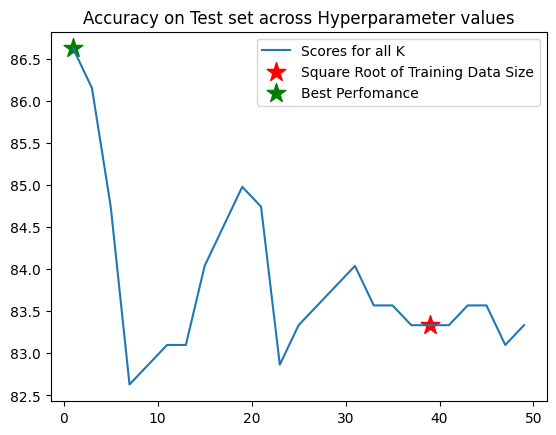

Top score of optimal classifier: 86.61971830985915
Best Value of K to use 1


In [26]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df[['histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency']], df[['fetal_health']],
                                      test_size=0.2, random_state=42)

# Hyperparameter tuning
scores = {}
for n in range(1,50,2):
    full_model = KNeighborsClassifier(n_neighbors = n)
    full_model.fit(X_train, y_train.to_numpy().reshape(-1))
    pred = full_model.predict(X_test)
    score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
    scores[n] = score


plt.title("Accuracy on Test set across Hyperparameter values")
print(scores)
plt.plot(list(scores.keys()), list(scores.values()), label = 'Scores for all K')

# ADDING THE PERFORMANCE FOR K = SQRT SIZE FOR REFERENCE
k = int(len(X_train)**(1/2)/2)*2 - 1
full_model = KNeighborsClassifier(n_neighbors = k)
full_model.fit(X_train, y_train.to_numpy().reshape(-1))
pred = full_model.predict(X_test)
score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
plt.scatter([k], [score], color = 'r', marker = '*', s = 200, label = 'Square Root of Training Data Size')


top_score = max(scores.values())
best_k = list(scores.keys())[list(scores.values()).index(top_score)]
plt.scatter([best_k], [top_score], color = 'g', marker = '*', s = 200, label = 'Best Perfomance')

plt.legend()
plt.show()



# PRINTING THE RESULTS
print("Top score of optimal classifier: " + str(top_score))
print("Best Value of K to use " + str(best_k))

In [27]:
features = df_h.drop(columns='fetal_health')
label = df_h['fetal_health']

feature_selector = SelectKBest(k = 1)
feature_selector.fit_transform(features, label)

best_features = df_h[feature_selector.get_feature_names_out()]

best_features.head()

,histogram_mean
0,137.0
1,136.0
2,135.0
3,134.0
4,136.0


Histogram mean is the best variable from the histograms to predict fetus health

machine learning model confuses suspected and normal the most

In [28]:
corr_matrix = df_h[['histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency', 'fetal_health']].corr()
print(corr_matrix)

                            histogram_width  histogram_min  histogram_max  \
histogram_width                    1.000000      -0.898519       0.690769   
histogram_min                     -0.898519       1.000000      -0.303286   
histogram_max                      0.690769      -0.303286       1.000000   
histogram_number_of_peaks          0.747071      -0.670287       0.517652   
histogram_number_of_zeroes         0.317276      -0.306567       0.183766   
histogram_mode                    -0.159261       0.353067       0.235877   
histogram_mean                    -0.280846       0.486121       0.191108   
histogram_median                  -0.168854       0.400191       0.292680   
histogram_variance                 0.615884      -0.545091       0.439094   
histogram_tendency                 0.118152      -0.242579      -0.143111   
fetal_health                      -0.068789       0.063175      -0.045265   

                            histogram_number_of_peaks  \
histogram_width   

fetal health most strongly correlates with histogram mean, median and mode, but nothing is close to one

histogram mean, median, and mode are all strongly positively correlated

In [29]:
anova_groups = [df_h['histogram_mean'].values for name, group in df_h.groupby('fetal_health')]
f_stat, p_val_anova = f_oneway(*anova_groups)
print("ANOVA Results:", f_stat, ",", p_val_anova)

ANOVA Results: -1.1760664222631648e-28 , nan


In [30]:
histmean_normal = df_h[df_h['fetal_health'] == 'normal']['histogram_mean']
histmean_suspected = df_h[df_h['fetal_health'] == 'normal']['histogram_mean']
histmean_pathological = df_h[df_h['fetal_health'] == 'normal']['histogram_mean']
t_stat, p_val_ttest = ttest_ind(histmean_normal, histmean_suspected)
print("T-test Results:", t_stat, ",", p_val_ttest)

T-test Results: nan , nan


why am I getting nan as the results of these tests?

Accuracy Score:  0.8967136150234741


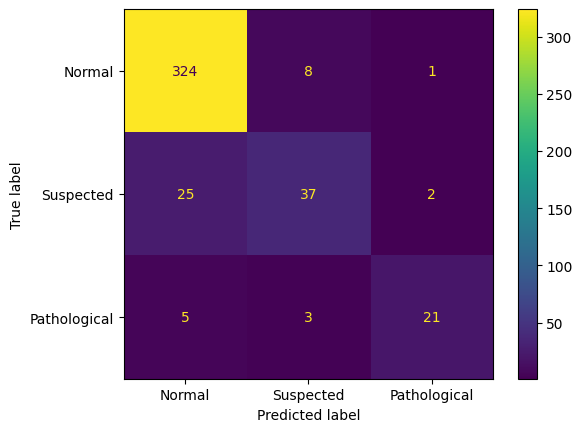

In [31]:
#WITH ACCELERATIONS, DECELERATIONS, VARIABILITY
features = df[['histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency', 'percentage_of_time_with_abnormal_long_term_variability', 'abnormal_short_term_variability', 'accelerations', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'baseline value']]
label = df['fetal_health']

X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 17)

model.fit(X_train, y_train)
predict = model.predict(X_test)

print("Accuracy Score: ", metrics.accuracy_score(y_test, predict))

metrics.ConfusionMatrixDisplay.from_predictions(y_test, predict, display_labels=["Normal", "Suspected", "Pathological"])


In [32]:
features = df.drop(columns='fetal_health')
label = df['fetal_health']

feature_selector = SelectKBest(k = 5)
feature_selector.fit_transform(features, label)

best_features = df[feature_selector.get_feature_names_out()]

best_features.head()

,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_mode,histogram_mean
0,0.0,73.0,43.0,120.0,137.0
1,0.0,17.0,0.0,141.0,136.0
2,0.0,16.0,0.0,141.0,135.0
3,0.0,16.0,0.0,137.0,134.0
4,0.0,16.0,0.0,137.0,136.0


In [33]:
corr_matrix_big  = df[['fetal_health', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency', 'percentage_of_time_with_abnormal_long_term_variability', 'abnormal_short_term_variability', 'accelerations', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'baseline value']].corr()
print(corr_matrix_big)

                                                    fetal_health  \
fetal_health                                            1.000000   
histogram_width                                        -0.068789   
histogram_min                                           0.063175   
histogram_max                                          -0.045265   
histogram_number_of_peaks                              -0.023666   
histogram_number_of_zeroes                             -0.016682   
histogram_mode                                         -0.250412   
histogram_mean                                         -0.226985   
histogram_median                                       -0.205033   
histogram_variance                                      0.206630   
histogram_tendency                                     -0.131976   
percentage_of_time_with_abnormal_long_term_vari...      0.426146   
abnormal_short_term_variability                         0.471191   
accelerations                                   

Linear and logistic Regression

In [34]:
#Split data into training and testing sets
X = df[['histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency', 'baseline value']]
y_linear = df['fetal_health'] # Target for linear regression
X_train, X_test, y_linear_train, y_linear_test = train_test_split(X, y_linear, test_size=0.3, random_state=42)

# Linear Regression: predicting fetal health using histogram variables
# Using statsmodels.api.OLS for better compatibility with train-test split prediction
# Add a constant to the training features
X_train_const = sm.add_constant(X_train)
lin_model = sm.OLS(y_linear_train, X_train_const).fit()

print("Linear Regression Results:")
print(lin_model.summary())

Linear Regression Results:
                            OLS Regression Results                            
Dep. Variable:           fetal_health   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     88.91
Date:                Fri, 25 Jul 2025   Prob (F-statistic):          1.87e-143
Time:                        17:19:45   Log-Likelihood:                -1071.7
No. Observations:                1488   AIC:                             2165.
Df Residuals:                    1477   BIC:                             2224.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

Oversampling below